 Importing The Required Modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

Loading The Dataset 

In [4]:
df = pd.read_csv('/home/manodharshan/Documents/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
print('Shape Of The Dataset:', df.shape)

Shape Of The Dataset: (200, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Visualizing The Data

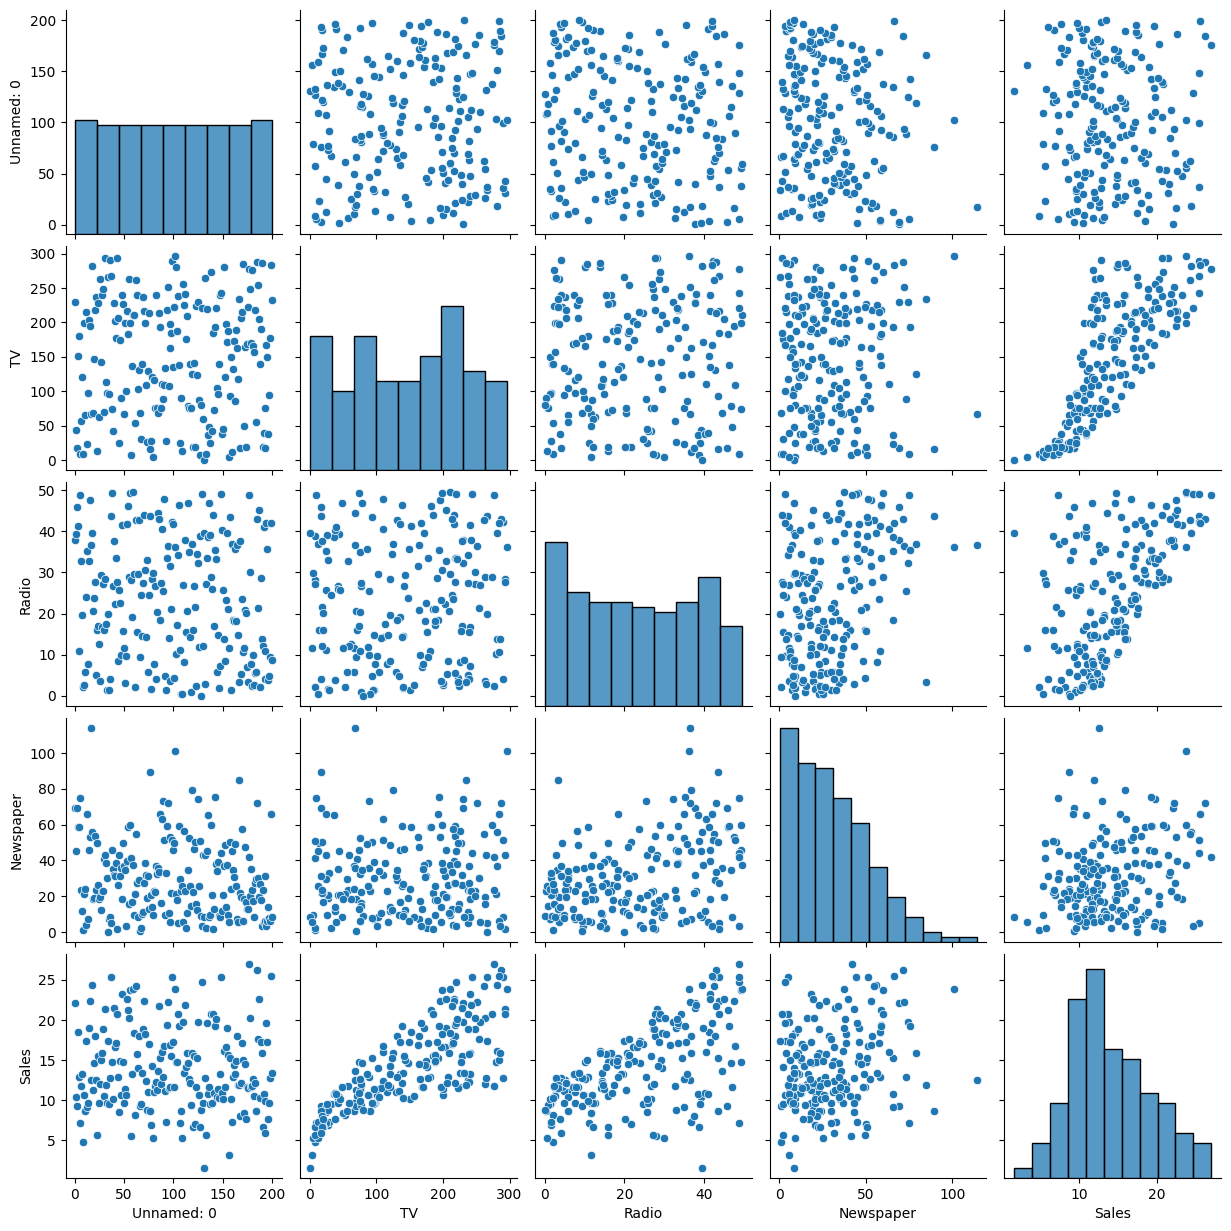

In [9]:
plt.show(sns.pairplot(df))

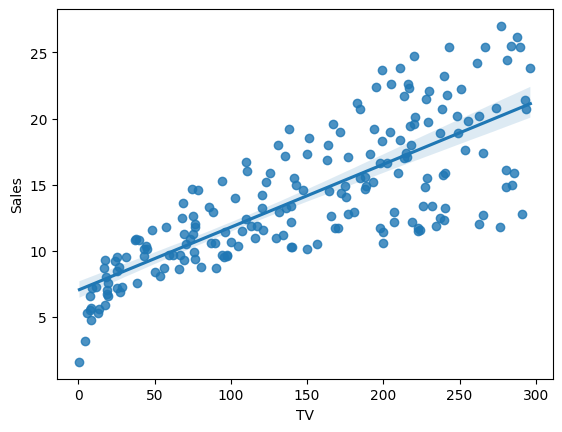

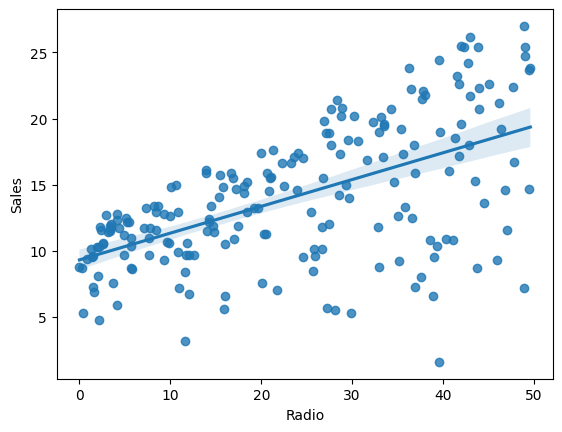

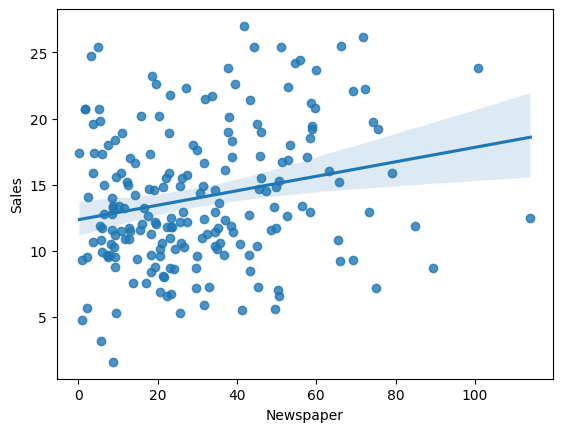

In [10]:
plt.show(sns.regplot(data=df, x='TV', y='Sales'))
plt.show(sns.regplot(data=df, x='Radio', y='Sales'))
plt.show(sns.regplot(data=df, x='Newspaper', y='Sales'))

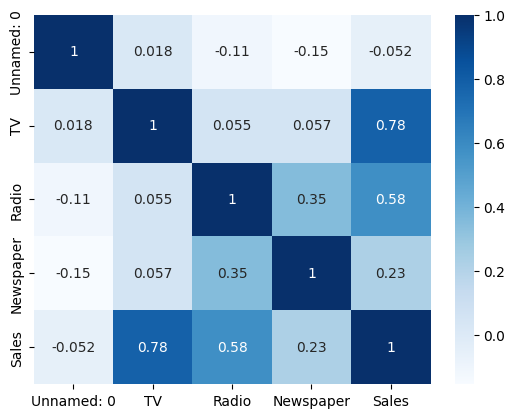

In [11]:
px.histogram(df, x='TV', y='Sales', title='Histogram For The Sales Of TV')

px.histogram(df, x='Radio', y='Sales', title='Histogram For The Sales Of Radio')

px.histogram(df, x='Newspaper', y='Sales', title='Histogram For The Sales Of Newspaper')

plt.show(sns.heatmap(data=(df.corr()), cmap="Blues", annot=True))

Spliting The Dataset For Training And Testing

In [12]:
x = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

Linear Regression Model

In [13]:
model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

In [15]:
LinearRegression()

y_hat = model.predict(x_test)
y_hat

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [16]:
acvspred = pd.DataFrame({'Actual':y_test, 'Predicted':y_hat})
acvspred.head()

,Actual,Predicted
0,11.3,10.057396
1,8.4,7.452281
2,8.7,7.019708
3,25.4,24.080297
4,11.7,12.017863


Best Fit Line For The Data Points

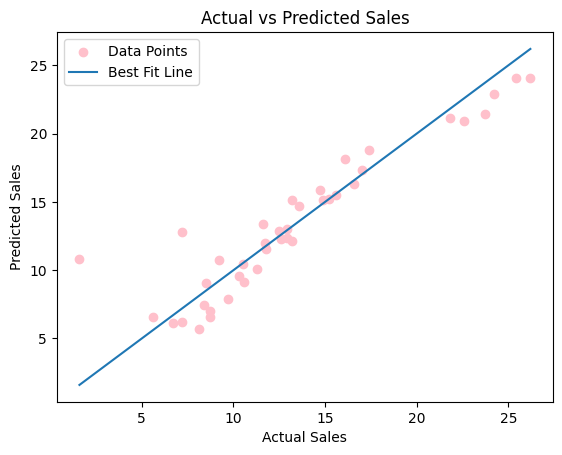

In [17]:
plt.scatter(x=y_test, y=y_hat, c='Pink', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], label='Best Fit Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [18]:
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test, y_hat)),
              '\nMean Absolute Error',mean_absolute_error(y_test, y_hat),
              '\nR2 Score',r2_score(y_test, y_hat))

Root Mean Squared Error 2.098122563495681 
Mean Absolute Error 1.361781350209028 
R2 Score 0.8601145185017868


In [19]:
coefficient_of_TV = model.coef_[0]
print("Coefficient Of TV:", coefficient_of_TV)
coefficient_of_Radio = model.coef_[1]
print("Coefficient Of Radio:", coefficient_of_Radio)
coefficient_of_Newspaper = model.coef_[2]
print("Coefficient Of Newspaper:", coefficient_of_Newspaper)

Coefficient Of TV: 0.04458402011996427
Coefficient Of Radio: 0.196497034155405
Coefficient Of Newspaper: -0.0027814639819259968


Testing The Model With Data

In [20]:
new_df = pd.DataFrame({'TV':[30], 'Radio':[50], 'Newspaper':[100]})
test = model.predict(new_df)
print('PREDICTED SALES FOR THE NEW SET OF DATA:',test)

PREDICTED SALES FOR THE NEW SET OF DATA: [13.87911894]
